# Pupil Synth Playground
Please see `pupil-synth-demo.ipynb` for a demonstration of the intended usage.
This notebook contains various experiments and may or may not be meaningful.

In [1]:
import numpy as np
from numpy.lib import pad
import random
import matplotlib.pyplot as plt
from matplotlib import rcParams

plt.gca().set_aspect('equal')
rcParams['figure.figsize'] = [10., 8.]

from src.source import CircularPupil, PointSource, EllipticalPupil
from src.pupil_plate_image import PupilPlateImage

In [2]:
inner_radius, outer_radius, counts = 100, 200, 600
cp = CircularPupil(inner_radius, outer_radius, counts)

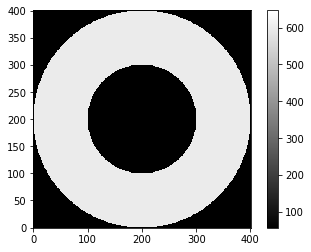

In [3]:
# show the decal
m, s = np.mean(cp.decal), np.std(cp.decal)
plt.imshow(cp.decal, interpolation='nearest', cmap='gray',
           vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

In [4]:
plate_image = PupilPlateImage()
cx = random.randint(400, 3696)
cy = random.randint(400, 3696)
plate_image.add_source(cp, cx, cy)

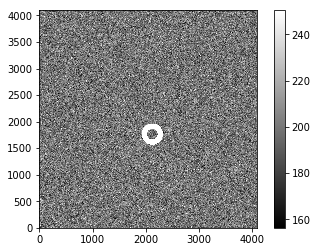

In [5]:
image = plate_image.render()
m, s = np.mean(image), np.std(image)
plt.imshow(image, interpolation='nearest', cmap='gray',
           vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

# TODO: sort out x,y row,column axes=0 is x? axis1 is y?

# Pixel Perfect Placement?

In [6]:
side_length = 64
shape = (side_length, side_length)
pp3 = PupilPlateImage(shape)


# add a PointSource
radius = 16
counts = 1.618*side_length
ps = PointSource(radius, counts)

psx = 40
psy = 40
pp3.add_source(ps, psx, psy)

# add a CircularPupil
inner_radius = 3
outer_radius = 16
cp1 = CircularPupil(inner_radius, outer_radius, counts,
                  center_vector=(1,1))

cpx = 32
cpy = 24
pp3.add_source(cp1, cpx, cpy)

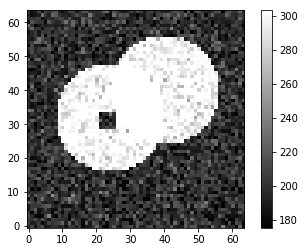

In [7]:
image = pp3.render()
m, s = np.mean(image), np.std(image)
plt.imshow(image, interpolation='nearest', cmap='gray',
           vmin=m-s, vmax=m+s,
           origin='lower')
plt.colorbar();

In [8]:
from src.source import EllipticalPupil
import numpy as np
import matplotlib.pyplot as plt

outer_a = 200
outer_b = 180
outer_phi = np.pi/3.

inner_a = 100
inner_b = 90
inner_phi = np.pi/3.
counts = 100
center_vector = (21, 34)

ep0 = EllipticalPupil(inner_a, inner_b, 0., outer_a, outer_b, 0., counts)

# add rotation
ep1 = EllipticalPupil(inner_a, inner_b, inner_phi, outer_a, outer_b, outer_phi,
                      counts)
# add center_vector
ep2 = EllipticalPupil(inner_a, inner_b, inner_phi, outer_a, outer_b, outer_phi,
                      counts, center_vector)

In [9]:
#data = ep1.d
#m, s = np.mean(data), np.std(data)
#plt.imshow(data, interpolation='nearest', cmap='gray',
#           vmin=m-s, vmax=m+s, origin='lower')
#plt.colorbar();

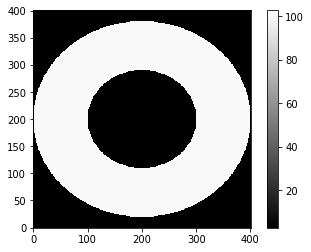

In [10]:
# show the decal
m, s = np.mean(ep0.decal), np.std(ep0.decal)
plt.imshow(ep0.decal, interpolation='nearest', cmap='gray',
           vmin=m-s, vmax=m+s,
           origin='lower')
plt.colorbar();

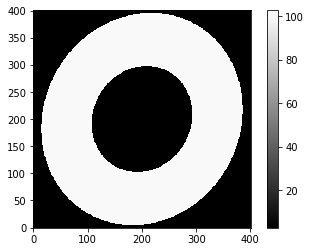

In [11]:
# show the decal
m, s = np.mean(ep1.decal), np.std(ep1.decal)
plt.imshow(ep1.decal, interpolation='nearest', cmap='gray',
           vmin=m-s, vmax=m+s,
           origin='lower')
plt.colorbar();

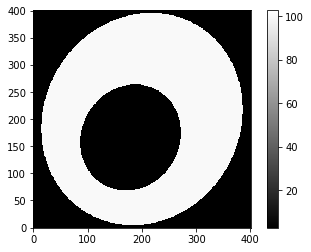

In [12]:
m, s = np.mean(ep2.decal), np.std(ep2.decal)
plt.imshow(ep2.decal, interpolation='nearest', cmap='gray',
           vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

# A < B

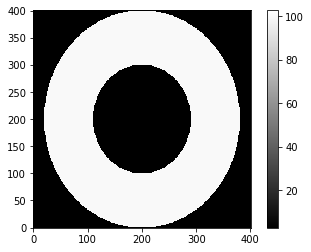

In [13]:
epBA = EllipticalPupil(inner_b, inner_a, 0., outer_b, outer_a, 0., counts)
m, s = np.mean(epBA.decal), np.std(epBA.decal)
plt.imshow(epBA.decal, interpolation='nearest', cmap='gray',
           vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

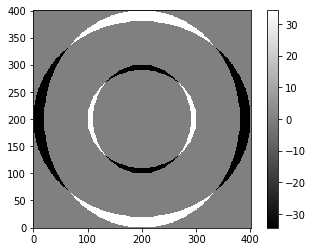

In [14]:
data = np.subtract(epBA.decal, ep0.decal)
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray',
           vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

# Add the EllipticPupils to the plate image

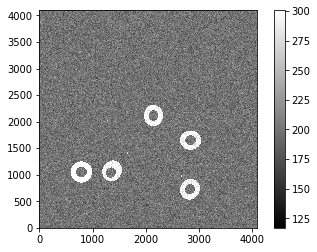

In [16]:
for s in [cp, cp1, ps, ep0, ep1, ep2, epBA]:
    cx = random.randint(400, 3696)
    cy = random.randint(400, 3696)
    plate_image.add_source(s, cx, cy)

image = plate_image.render()
m, s = np.mean(image), np.std(image)
plt.imshow(image, interpolation='nearest', cmap='gray',
           vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();


In [18]:
from scipy.ndimage.filters import sobel

#plate_image.data = np.abs(sobel(plate_image.data, axis=1))
sobel0 = np.abs(sobel(plate_image.data, axis=0))
sobel1 = np.abs(sobel(plate_image.data, axis=1))
#plate_image.data = np.maximum(sobel0, sobel1)  ###################### NO-OP right now....

m, s = np.mean(plate_image.data), np.std(plate_image.data)
plt.imshow(plate_image.data, interpolation='nearest', cmap='gray',
           vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

AttributeError: 'PupilPlateImage' object has no attribute 'data'

### looks nice, but this won't work on real data. (see pupe-pat ipynb)

# Inspect Cutout generation

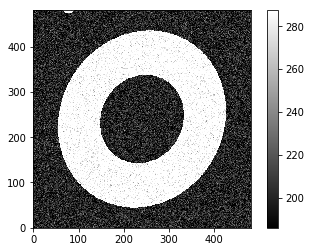

In [19]:
cutout = plate_image.cutout_for_source(ep1)

m, s = np.mean(cutout), np.std(cutout)
plt.imshow(cutout, interpolation='nearest', cmap='gray',
           vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

# Radial Sobel filter on cutout may detect ellipses to be fit by Least Squares

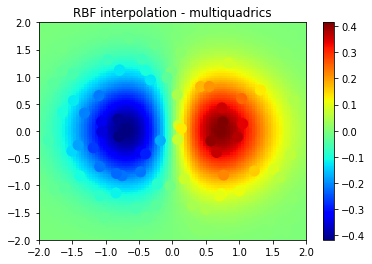

In [20]:
# https://scipy-cookbook.readthedocs.io/items/RadialBasisFunctions.html?highlight=radial%20
from scipy.interpolate import Rbf

import matplotlib
#matplotlib.use('Agg')
from matplotlib import cm

# 2-d tests - setup scattered data
x = np.random.rand(100)*4.0-2.0
y = np.random.rand(100)*4.0-2.0
z = x*np.exp(-x**2-y**2)
ti = np.linspace(-2.0, 2.0, 100)
XI, YI = np.meshgrid(ti, ti)

# use RBF
rbf = Rbf(x, y, z, epsilon=2)
ZI = rbf(XI, YI)

# plot the result
#n = plt.normalize(-2., 2.)
plt.subplot(1, 1, 1)
plt.pcolor(XI, YI, ZI, cmap=cm.jet)
plt.scatter(x, y, 100, z, cmap=cm.jet)
plt.title('RBF interpolation - multiquadrics')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.colorbar()

# Fitting 1: try a simple Ring2D (with correct guesses)

In [21]:
from astropy.modeling.models import Ring2D
from astropy.modeling import fitting

rand_limit = 3
amplitude_g = cp.counts + random.randint(-rand_limit, rand_limit)
x0_g = cp.x + random.randint(-rand_limit, rand_limit)
y0_g = cp.y + random.randint(-rand_limit, rand_limit)
r_in_g = cp.inner_radius + random.randint(-rand_limit, rand_limit)
r_out_g = cp.outer_radius + random.randint(-rand_limit, rand_limit)

ring2D = Ring2D(amplitude=amplitude_g, x_0=x0_g, y_0=y0_g, r_out=r_out_g, r_in=r_in_g)
x, y = np.meshgrid(np.arange(cutout.shape[0]), np.arange(cutout.shape[1]))
fitter = fitting.SimplexLSQFitter()

best_fit = fitter(ring2D, x, y, cutout, maxiter=20000)

print(cp)
print(best_fit)

CircularPupil(inner_radius=100.00, outer_radius= 200.00, counts=600, x=1052, y=797)
Model: Ring2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
    amplitude  x_0    y_0  r_in width
    --------- ------ ----- ---- -----
        603.0 1052.0 797.0 97.0 102.0


# Fitting 2: Incorporate PUPE-PAT elliptical_annulus @custom_model 


In [22]:
def inside_ellipse(x, y, x0, y0, a, b, theta):
    """
    Calculate if x and y are in an ellipse.

    :param x: X coordinates to check if in ellipse
    :param y: Y coordinates to check if in ellipse
    :param x0: X center of the ellipse
    :param y0: Y center of the ellipse
    :param a: semimajor axis
    :param b: semiminor axis
    :param theta: orientation of the semimajor axis
    :return: boolean numpy array
    """
    x_recentered = x - x0
    y_recentered = y - y0

    semimajor_term = x_recentered * np.cos(theta) + y_recentered * np.sin(theta)
    semimajor_term /= a
    semimajor_term **= 2.0

    semiminor_term = y_recentered * np.cos(theta) - x_recentered * np.sin(theta)
    semiminor_term /= b
    semiminor_term **= 2.0

    return semimajor_term + semiminor_term <= 1.0

from astropy.modeling import custom_model

@custom_model
def elliptical_annulus(x, y, x0_inner=0.0, y0_inner=0.0, a_inner=1.0, b_inner=1.0, theta_inner=0.0, amplitude_inner=1.0,
                       x0_outer=0.0, y0_outer=0.0, a_outer=1.0, b_outer=1.0, theta_outer=0.0, amplitude_outer=1.0,
                       x_slope=0.0, y_slope=0.0, background=0.0):
    """
    2D Elliptical Annulus

    :param x: X positions to evaluate the model
    :param y: Y positions to evaluate the model
    :param x0_inner: X center of the inner boundary of the annulus
    :param y0_inner: Y center of the inner boundary of the annulus
    :param a_inner: Semi-major axis length of the inner boundary of the annulus
    :param b_inner: Semi-minor axis length of the inner boundary of the annulus
    :param theta_inner: The rotation angle of the semi-major axis in radians of the inner boundary of the annulus
    :param amplitude_inner: Amplitude of the region inside the inner boundary of the annulus
    :param x0_outer: X center of the outer boundary of the annulus
    :param y0_outer: Y center of the outer boundary of the annulus
    :param a_outer:  Semi-major axis length of the outer boundary of the annulus
    :param b_outer:  Semi-minor axis length of the outer boundary of the annulus
    :param theta_outer: The rotation angle of the semi-major axis in radians of the outer boundary of the annulus
    :param amplitude_outer: Amplitude of the region inside the annulus
    :param x_slope: Slope in the X-direction for the flux in the annulus
    :param y_slope: Slope in the Y-direction for the flux in the annulus
    :param background: Background level

    :return: numpy array with amplitude_inner inside the inner boundary of the annulus and amplitude_outer in the
             annulus
    """

    result = np.zeros(x.shape)
    # Include a gradient in the flux
    inside_outer = inside_ellipse(x, y, x0_outer, y0_outer, a_outer, b_outer, theta_outer)
    result[inside_outer] = amplitude_outer + x_slope * x[inside_outer] + y_slope * y[inside_outer]
    result[inside_ellipse(x, y, x0_inner, y0_inner, a_inner, b_inner, theta_inner)] = amplitude_inner
    result[~inside_outer] = background
    return result


In [24]:
# here are the original parameters for some ellipses
# ep00: centered, un-rotated, A=B
# ep0: centered, un-rotated 
# ep1: ep0 + rotation
# ep2: ep1 + center_vector

outer_a = 200
outer_b = 180
outer_phi = np.pi/3.

inner_a = 100
inner_b = 90
inner_phi = np.pi/3.
counts = 1000
center_vector = (21, 34)

cx, cy = 2048, 2048

# should be the same as a CircularPupil(inner_a, outer_a, counts)
ep00 = EllipticalPupil(inner_a, inner_a, 0., outer_a, outer_a, 0., counts)

plate_image = PupilPlateImage()
plate_image.add_source(ep00, cx, cy)
#plate_image.data = gaussian_filter(plate_image.data, sigma=16)

source_to_fit = ep00
cutout = plate_image.cutout_for_source(source_to_fit)

# guess the center coords of inner and outer ellipses
inner_cx, inner_cy = source_to_fit.x, source_to_fit.y
outer_cx = inner_cx + source_to_fit.center_vector[0]
outer_cy = inner_cx + source_to_fit.center_vector[1]

# guess the outer ellipse parameters
outer_a_g = source_to_fit.outer_a # 200
outer_b_g = source_to_fit.outer_b # 180
outer_phi_g = source_to_fit.outer_phi  # np.pi/3.

# guess the inner ellipse parameters
inner_a_g = source_to_fit.inner_a # 100
inner_b_g = source_to_fit.inner_b # 90
inner_phi_g = source_to_fit.inner_phi # np.pi/3.

# guess the center_vector
center_vector_g = source_to_fit.center_vector  # (21, 34)

# guess the amplitude of the foreground/background
counts_g = source_to_fit.counts  # 1000
background_g = 0  # 0

cx_g, cy_g = cx, cy

### 1. define model function
### 2. make parameter guesses
### 3. initial model = model_function(guesses)
### 4. get a fitter
### 5. solution = fitter(model, data, fitter_parameters)
### 6. evaluate solution

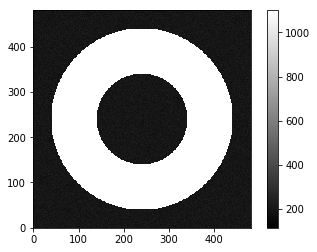

In [25]:
m, s = np.mean(cutout), np.std(cutout)
plt.imshow(cutout, interpolation='nearest', cmap='gray',
           vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

In [26]:
# Check ep00 against Ring2D model
amplitude_g = ep00.counts
x0_g = ep00.x
y0_g = ep00.y
r_in_g = ep00.inner_a
r_out_g = ep00.outer_a

ring2D = Ring2D(amplitude=amplitude_g,
                x_0=x0_g, y_0=y0_g,
                r_out=r_out_g, r_in=r_in_g)

x, y = np.meshgrid(np.arange(cutout.shape[0]), np.arange(cutout.shape[1]))
fitter = fitting.SimplexLSQFitter()

best_fit = fitter(ring2D, x, y, cutout, maxiter=20000)

print(ep00)
print(best_fit)

EllipticalPupil(inner_a=100.00, inner_b=100.00, inner_phi=0.00, outer_a=200.00, outer_b=200.00, outer_phi=0.00, counts=1000 x=2048, y=2048)
Model: Ring2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
    amplitude  x_0    y_0    r_in width
    --------- ------ ------ ----- -----
       1000.0 2048.0 2048.0 100.0 100.0


In [27]:
# 3. initial model = model_function(guesses)

ea_model = elliptical_annulus(
    x0_inner=inner_cx,
    y0_inner=inner_cy,
    a_inner=inner_a_g,
    b_inner=inner_b_g,
    theta_inner=inner_phi_g,
    
    x0_outer=outer_cx,
    y0_outer=outer_cy,
    a_outer=outer_a_g,
    b_outer=outer_b_g,
    theta_outer=outer_phi_g,
    
    amplitude_inner=background_g,
    amplitude_outer=counts_g,
    background=background_g
)

ea00_model = elliptical_annulus(
    x0_inner=ep00.x,
    y0_inner=ep00.y,
    a_inner=ep00.inner_a,
    b_inner=ep00.inner_b,
    theta_inner=ep00.inner_phi,
    
    x0_outer=ep00.x,
    y0_outer=ep00.y,
    a_outer=ep00.outer_a,
    b_outer=ep00.outer_b,
    theta_outer=ep00.outer_phi,
    
    amplitude_inner=0,
    amplitude_outer=ep00.counts,
    background=0
)
x, y = np.meshgrid(np.arange(cutout.shape[0]), np.arange(cutout.shape[1]))
fitter = fitting.SimplexLSQFitter()

best_fit = fitter(ea00_model, x, y, cutout,
                  #weights=1.0,
                  maxiter=20000,
                  #acc=1e-6
                 )

print(source_to_fit)
print(best_fit)

EllipticalPupil(inner_a=100.00, inner_b=100.00, inner_phi=0.00, outer_a=200.00, outer_b=200.00, outer_phi=0.00, counts=1000 x=2048, y=2048)
Model: elliptical_annulus
Inputs: ('x', 'y')
Outputs: ('x',)
Model set size: 1
Parameters:
          x0_inner           y0_inner      ...      y_slope           background   
    ------------------- ------------------ ... ------------------ -----------------
    -2228360.2104215957 -66086877.09430671 ... -340.0005214460482 607.3247052869199


# Astropy.modeling Example: Ellipse2D

(500, 500)


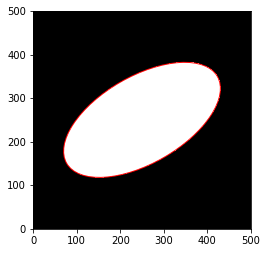

In [28]:
# http://docs.astropy.org/en/stable/modeling/index.html#simple-2-d-model-fitting

import numpy as np
from astropy.modeling.models import Ellipse2D, Ring2D
from astropy.coordinates import Angle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

x0, y0 = 250, 250
a, b = 200, 100
theta = Angle(30, 'deg')
e = Ellipse2D(amplitude=100., x_0=x0, y_0=y0, a=a, b=b,
              theta=theta.radian)

resolution = 500
y, x = np.mgrid[0:resolution, 0:resolution]
solved_e = e(x, y)
print(solved_e.shape)


fig, ax = plt.subplots(1, 1)
plt.imshow(solved_e, origin='lower', interpolation='none', cmap='Greys_r')

e2 = mpatches.Ellipse((x0, y0), 2*a, 2*b, theta.degree, edgecolor='red',
                      facecolor='none')
ax.add_patch(e2)
plt.show()


# Make an Ellipse
- generate points on a circle with polar coords.
- Turn Ellipse parameters into 2D transformation matrices
   - a, b ==> Scaling matrix
   - phi  ==> Rotation matrix
- Push circle coords through the combined matrix and out comes an ellipse.

In [29]:
# Polar-coordinatedly make a circle
theta = np.linspace(0, 2*np.pi, 500)

r = 1. / np.sqrt((np.cos(theta) ** 2) + (np.sin(theta) ** 2))

x = r * np.cos(theta)
y = r * np.sin(theta)

circle = np.array([x, y])
#print(circle)

# tranform the circle into an ellipse
a = 5
b = 3
phi = np.pi/3

# construct a 2-D Scaling matrix
Scale = np.array([[a, 0], [0, b]])

# construct a 2-D rotation matrix
Rotate = np.array([[np.cos(phi), -np.sin(phi)], [np.sin(phi), np.cos(phi)]])

# combine the matricies
Transform = np.dot(Rotate, Scale)
# push the points through the combined tranformation matrix
ellipse = np.dot(Transform, circle)


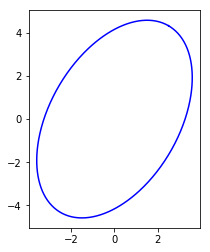

In [30]:
fig, ax = plt.subplots()
plt.gca().set_aspect('equal')#, adjustable='box')
ax.plot(ellipse[0], ellipse[1], color='b', linestyle='-');

# Least Squares Ellipse Fitting with References

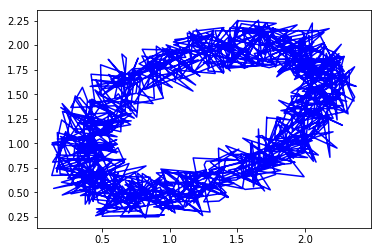

In [31]:
#https://github.com/bdhammel/least-squares-ellipse-fitting

def make_ellipse(center=[1,1], width=1, height=.6, phi=3.14/5, add_noise=True):
    
    t = np.linspace(0, 2*np.pi, 1000)
    if add_noise:
        x_noise, y_noise = np.random.rand(2, len(t))
    else:
        x_noise, y_noise = 0, 0
    
    ellipse_x = center[0] + width*np.cos(t)*np.cos(phi)-height*np.sin(t)*np.sin(phi) + x_noise/2.
    ellipse_y = center[1] + width*np.cos(t)*np.sin(phi)+height*np.sin(t)*np.cos(phi) + y_noise/2.

    return ellipse_x, ellipse_y

ex, ey = make_ellipse()
fig, ax = plt.subplots()
ax.plot(ex, ey, color='b', linestyle='-');

In [32]:
#https://github.com/bdhammel/least-squares-ellipse-fitting
import numpy

"""Demonstration of least-squares fitting of ellipses
    __author__ = "Ben Hammel, Nick Sullivan-Molina"
    __credits__ = ["Ben Hammel", "Nick Sullivan-Molina"]
    __maintainer__ = "Ben Hammel"
    __email__ = "bdhammel@gmail.com"
    __status__ = "Development"
    Requirements 
    ------------
    Python 2.X or 3.X
    numpy
    matplotlib
    References
    ----------
    (*) Halir, R., Flusser, J.: 'Numerically Stable Direct Least Squares 
        Fitting of Ellipses'
    (**) http://mathworld.wolfram.com/Ellipse.html
    (***) White, A. McHale, B. 'Faraday rotation data analysis with least-squares 
        elliptical fitting'
"""

class LSqEllipse:

    def fit(self, data):
        """Lest Squares fitting algorithm 
        Theory taken from (*)
        Solving equation Sa=lCa. with a = |a b c d f g> and a1 = |a b c> 
            a2 = |d f g>
        Args
        ----
        data (list:list:float): list of two lists containing the x and y data of the
            ellipse. of the form [[x1, x2, ..., xi],[y1, y2, ..., yi]]
        Returns
        ------
        coef (list): list of the coefficients describing an ellipse
           [a,b,c,d,f,g] corresponding to ax**2+2bxy+cy**2+2dx+2fy+g
        """
        x, y = numpy.asarray(data, dtype=float)

        #Quadratic part of design matrix [eqn. 15] from (*)
        D1 = numpy.mat(numpy.vstack([x**2, x*y, y**2])).T
        #Linear part of design matrix [eqn. 16] from (*)
        D2 = numpy.mat(numpy.vstack([x, y, numpy.ones(len(x))])).T
        
        #forming scatter matrix [eqn. 17] from (*)
        S1 = D1.T*D1
        S2 = D1.T*D2
        S3 = D2.T*D2  
        
        #Constraint matrix [eqn. 18]
        C1 = numpy.mat('0. 0. 2.; 0. -1. 0.; 2. 0. 0.')

        #Reduced scatter matrix [eqn. 29]
        M=C1.I*(S1-S2*S3.I*S2.T)

        #M*|a b c >=l|a b c >. Find eigenvalues and eigenvectors from this equation [eqn. 28]
        eval, evec = numpy.linalg.eig(M) 

        # eigenvector must meet constraint 4ac - b^2 to be valid.
        cond = 4*numpy.multiply(evec[0, :], evec[2, :]) - numpy.power(evec[1, :], 2)
        a1 = evec[:, numpy.nonzero(cond.A > 0)[1]]
        
        #|d f g> = -S3^(-1)*S2^(T)*|a b c> [eqn. 24]
        a2 = -S3.I*S2.T*a1
        
        # eigenvectors |a b c d f g> 
        self.coef = numpy.vstack([a1, a2])
        self._save_parameters()
            
    def _save_parameters(self):
        """finds the important parameters of the fitted ellipse
        
        Theory taken form http://mathworld.wolfram
        Args
        -----
        coef (list): list of the coefficients describing an ellipse
           [a,b,c,d,f,g] corresponding to ax**2+2bxy+cy**2+2dx+2fy+g
        Returns
        _______
        center (List): of the form [x0, y0]
        width (float): major axis 
        height (float): minor axis
        phi (float): rotation of major axis form the x-axis in radians 
        """

        #eigenvectors are the coefficients of an ellipse in general form
        #a*x^2 + 2*b*x*y + c*y^2 + 2*d*x + 2*f*y + g = 0 [eqn. 15) from (**) or (***)
        a = self.coef[0,0]
        b = self.coef[1,0]/2.
        c = self.coef[2,0]
        d = self.coef[3,0]/2.
        f = self.coef[4,0]/2.
        g = self.coef[5,0]
        
        #finding center of ellipse [eqn.19 and 20] from (**)
        x0 = (c*d-b*f)/(b**2.-a*c)
        y0 = (a*f-b*d)/(b**2.-a*c)
        
        #Find the semi-axes lengths [eqn. 21 and 22] from (**)
        numerator = 2*(a*f*f+c*d*d+g*b*b-2*b*d*f-a*c*g)
        denominator1 = (b*b-a*c)*( (c-a)*numpy.sqrt(1+4*b*b/((a-c)*(a-c)))-(c+a))
        denominator2 = (b*b-a*c)*( (a-c)*numpy.sqrt(1+4*b*b/((a-c)*(a-c)))-(c+a))
        width = numpy.sqrt(numerator/denominator1)
        height = numpy.sqrt(numerator/denominator2)

        # angle of counterclockwise rotation of major-axis of ellipse to x-axis [eqn. 23] from (**)
        # or [eqn. 26] from (***).
        phi = .5*numpy.arctan((2.*b)/(a-c))

        self._center = [x0, y0]
        self._width = width
        self._height = height
        self._phi = phi

    @property
    def center(self):
        return self._center

    @property
    def width(self):
        return self._width

    @property
    def height(self):
        return self._height

    @property
    def phi(self):
        """angle of counterclockwise rotation of major-axis of ellipse to x-axis 
        [eqn. 23] from (**)
        """
        return self._phi

    def parameters(self):
        return self.center, self.width, self.height, self.phi


def make_test_ellipse(center=[1,1], width=1, height=.6, phi=3.14/5):
    """Generate Elliptical data with noise
    
    Args
    ----
    center (list:float): (<x_location>, <y_location>)
    width (float): semimajor axis. Horizontal dimension of the ellipse (**)
    height (float): semiminor axis. Vertical dimension of the ellipse (**)
    phi (float:radians): tilt of the ellipse, the angle the semimajor axis
        makes with the x-axis 
    Returns
    -------
    data (list:list:float): list of two lists containing the x and y data of the
        ellipse. of the form [[x1, x2, ..., xi],[y1, y2, ..., yi]]
    """
    t = numpy.linspace(0, 2*numpy.pi, 1000)
    x_noise, y_noise = numpy.random.rand(2, len(t))
    
    ellipse_x = center[0] + width*numpy.cos(t)*numpy.cos(phi)-height*numpy.sin(t)*numpy.sin(phi) + x_noise/2.
    ellipse_y = center[1] + width*numpy.cos(t)*numpy.sin(phi)+height*numpy.sin(t)*numpy.cos(phi) + y_noise/2.

    return [ellipse_x, ellipse_y]

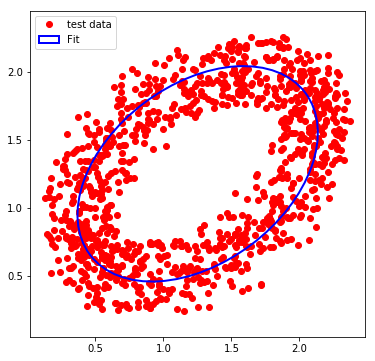

In [33]:
#https://github.com/bdhammel/least-squares-ellipse-fitting

from matplotlib.patches import Ellipse

data = make_test_ellipse()

lsqe = LSqEllipse()
lsqe.fit(data)
center, width, height, phi = lsqe.parameters()

plt.close('all')
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.axis('equal')
ax.plot(data[0], data[1], 'ro', label='test data', zorder=1)

ellipse = Ellipse(xy=center, width=2*width, height=2*height, angle=np.rad2deg(phi),
               edgecolor='b', fc='None', lw=2, label='Fit', zorder = 2)
ax.add_patch(ellipse)

plt.legend()
plt.show()

In [34]:
from skimage.transform import hough_circle

try_radii = np.arange(90, 210, 10)
result = hough_circle(cp.decal, try_radii)
ridx, r, c = np.unravel_index(np.argmax(result), result.shape)

r, c, try_radii[ridx]

(161, 194, 160)

# Noise Modeling

http://kmdouglass.github.io/posts/modeling-noise-for-image-simulations.html

In [35]:
from numpy.fft import fft2, fftshift, ifftshift
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import animation

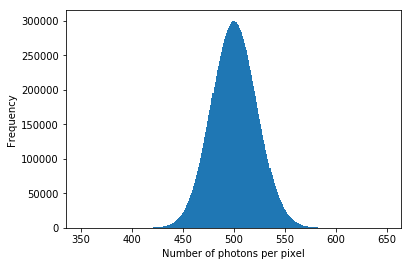

In [36]:
# set up image parameters: size, photons hitting each pixel
num_photons = 500
num_pixels = 4096

# make the random data reproducable by specifying the seed
seed       = 42
rs         = np.random.RandomState(seed)
shot_noise = rs.poisson(num_photons, (num_pixels, num_pixels))

# look at the distribution of photons hitting each pixel.
plt.hist(shot_noise.ravel(), bins=np.arange(350, 650))
plt.xlabel('Number of photons per pixel')
plt.ylabel('Frequency')
plt.show()

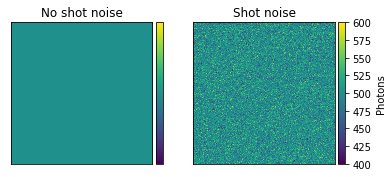

In [37]:
# Compare images with and w/out Shot Noise

# No shot noise: num_photons Photons per pixel
mu_p        = num_photons * np.ones((num_pixels, num_pixels))
fig, (ax0, ax1) = plt.subplots(ncols=2)
img0 = ax0.imshow(mu_p, vmin=400, vmax=600)

ax0.set_xticks([])
ax0.set_yticks([])
ax0.set_title('No shot noise')

divider = make_axes_locatable(ax0)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb0 = plt.colorbar(img0, cax=cax)
cb0.set_ticks([])

img1 = ax1.imshow(shot_noise, vmin=400, vmax=600)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Shot noise')

divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb1 = plt.colorbar(img1, cax=cax)
cb1.set_label('Photons')

plt.show()